In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
V = 'V0*(tanh(phi/sqrt(6)))**2*(1 + A*(sech((phi - phi0)/sigma))**2)'
parameters = {'V0' : 1.448e-10, 'A' : 2.044880e-3, 'phi0' : 4.850001, 'sigma': 2.524999e-2}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 6.3) 
background.solve()
background.save_data()

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data[i] for i in vars)
Nend = background.data['N'][-1]

In [5]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 60)
sol = pert.solver()


In [6]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 60)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
#print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

In [7]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [8]:
P_s_pivot, P_t_pivot, r_pivot

(2.092418802547975e-09, 9.439803065737744e-12, 0.004511431007140029)

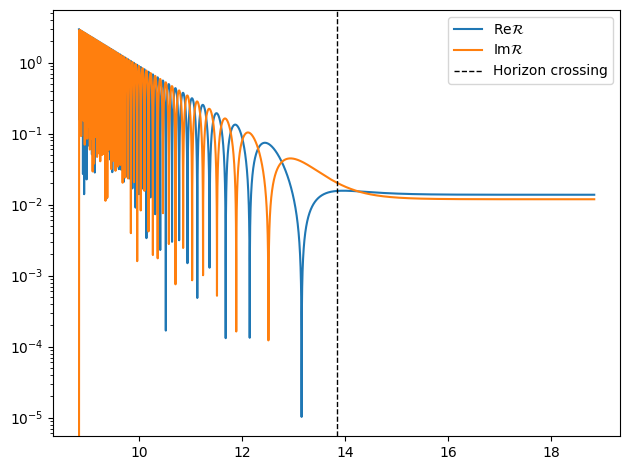

In [9]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [10]:
PS = pert.Power_spectrum(save = True)

k_peak = 4.80\times 10^{+12} Mpc^-1
N_peak = 46.054125497612254
P_s(k_peak) = 0.03087035644923752


<Figure size 800x500 with 0 Axes>

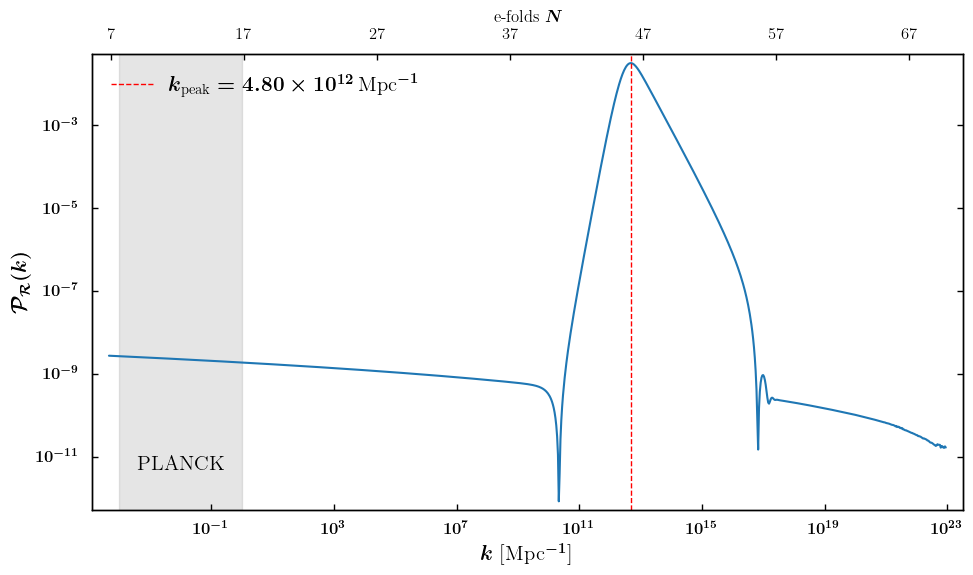

In [11]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar')

In [13]:
print(pert.Spectral_tilts)

{'n_s': 0.9607538251972026, 'n_t': -0.0007058314021094877}


## PBH Abundance after re-entry horizon in RD era

In [14]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 0.9661364130354699
MPBH_peak = 1.5881318171524883e-13 M⊙


(1e-20, 10000.0)

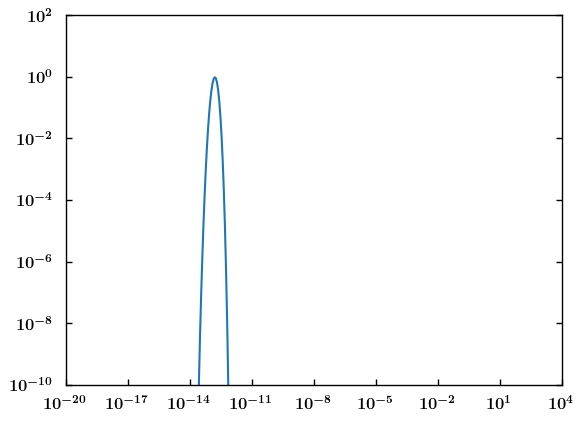

In [15]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-10, 1e2)
plt.xlim(1e-20, 1e4)
